**Import data:**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!ls /gdrive/My\ Drive/CAE\ Challenge

CAE_dataset.csv  CAE-ML.ipynb	       strategy.gdoc
CAE.ipynb	 CAE_test_dataset.csv  weights_model.hd5


In [0]:
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
%cd /gdrive/My\ Drive/CAE\ Challenge

/gdrive/My Drive/CAE Challenge


In [0]:
df=pd.read_csv("CAE_dataset.csv")

In [0]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,label,Id
0,0,0.134880,-42.08892,-0.037386,-0.184788,50.546875,19.775391,86.24073,-0.304381,-0.452958,132.4768,0,327
1,1,0.134641,-41.84206,-0.036891,-0.181393,50.468750,19.775391,86.99523,-0.290598,-0.421575,132.4768,0,327
2,2,0.135263,-41.84206,-0.035995,-0.181039,50.000000,19.726562,86.99523,-0.273311,-0.383049,132.4768,0,327
3,3,0.136999,-41.58644,-0.035182,-0.182234,50.000000,18.359375,87.54987,-0.254571,-0.338215,132.4768,0,327
4,4,0.139939,-41.58644,-0.034691,-0.183275,50.000000,15.673828,87.85726,-0.236445,-0.287707,132.4768,0,327


In [0]:
df[df.isnull().any(1)].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,label,Id
2598,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,234
2793,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,234
5468,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,217
5789,5789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,217
5969,5969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,217


In [0]:
df.loc[2595:2600]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,label,Id
2595,2595,12.153601,-295.4609,0.665034,7.953073,54.804688,55.029297,93.63392,-2.950437,-2.404831,132.8231,0,234
2596,2596,12.153601,-295.4609,0.665034,7.953073,54.804688,55.029297,93.63392,-2.950437,-2.404831,132.8231,0,234
2597,2597,12.743109,-297.3965,1.236872,8.005969,61.171875,53.857422,93.67831,-3.444981,-2.993632,132.8226,0,234
2598,2598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,234
2599,2599,13.230429,-299.1299,1.575977,8.045959,64.648438,59.375000,93.68417,-3.814371,-3.495792,132.8226,0,234
2600,2600,13.230429,-299.1299,1.575977,8.045959,64.648438,59.375000,93.68417,-3.814371,-3.495792,132.8226,0,234


In [0]:
df.interpolate()[df.isnull().any(1)].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,label,Id
2598,2598,12.986769,-298.26320,1.406424,8.025964,62.910156,56.616211,93.681240,-3.629676,-3.244712,132.8226,0,234
2793,2793,-94.987747,-125.07275,-1.131984,12.806697,50.000000,48.413086,93.803695,0.208563,-0.845462,132.8042,0,234
5468,5468,0.765672,-39.98327,-0.052114,-0.009748,50.000000,37.841797,84.434830,-0.249234,-0.034420,132.4972,0,217
5789,5789,10.602059,-232.66715,0.030933,-0.239854,42.187500,60.327148,82.120195,-0.426745,-1.639856,132.4360,0,217
5969,5969,-66.237178,-203.70510,-1.709171,12.894523,37.890625,45.214844,93.719870,-1.577958,-3.704270,132.4259,0,217


In [0]:
df = df.interpolate()

In [0]:
df.shape

(385768, 13)

In [0]:
df["Id"].unique().shape

(444,)

**Data exploration:**

Sample Flag 1


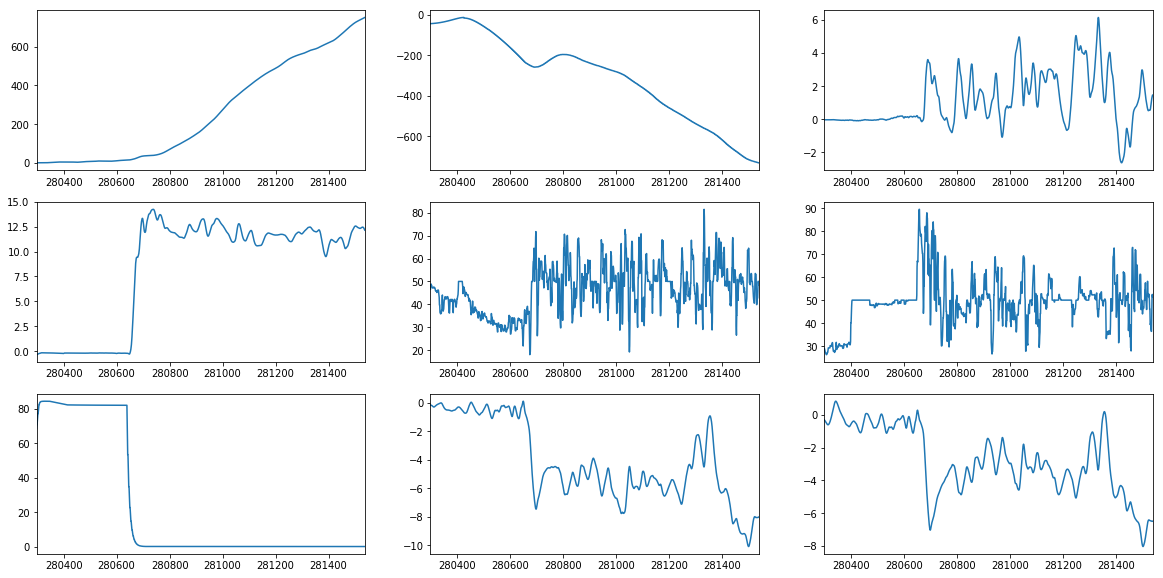

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = 3
plt.figure(figsize=(20,10))
print("Sample Flag",df.loc[df["Id"]==idx,"label"].unique()[0])
for feature in range(9):
    plt.subplot(3,3,feature+1)
    df.loc[df["Id"]==idx,f"{feature}"].plot()

In [0]:
from collections import Counter

idx_to_label = df[["Id","label"]].drop_duplicates()
Counter(idx_to_label["label"])

Counter({0: 291, 1: 153})

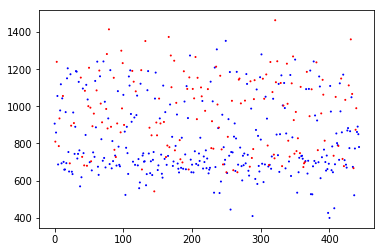

In [0]:
ids, counts = zip(*Counter(df["Id"]).items())
plt.scatter(ids, counts, c = list(map(lambda x:"red" if idx_to_label.loc[idx_to_label["Id"]==x,"label"].values[0] else "blue",ids)),s=1)

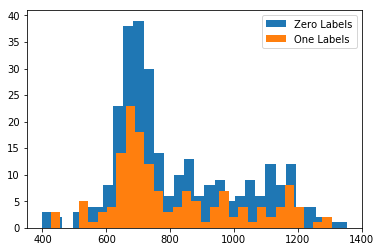

In [0]:
import numpy as np
mask_zero = np.where(idx_to_label.loc[idx_to_label["label"]==0,"Id"])
mask_one = np.where(idx_to_label.loc[idx_to_label["label"]==1,"Id"])
plt.hist(np.array(counts)[mask_zero],label="Zero Labels",bins=30)
plt.hist(np.array(counts)[mask_one],label="One Labels",bins=30)
plt.legend();

**Construct learning matrix**

In [0]:
def seperate_ts(data, ids):
    ts = []
    for idx in ids:
        features = []
        for feature in range(10):
            features.append(df.loc[df["Id"]==idx,f"{feature}"].values)
        ts.append(np.array(features))
    return ts
all_ts = seperate_ts(df, idx_to_label["Id"].values)
len(all_ts)

444

**over lap one feature for different samples**

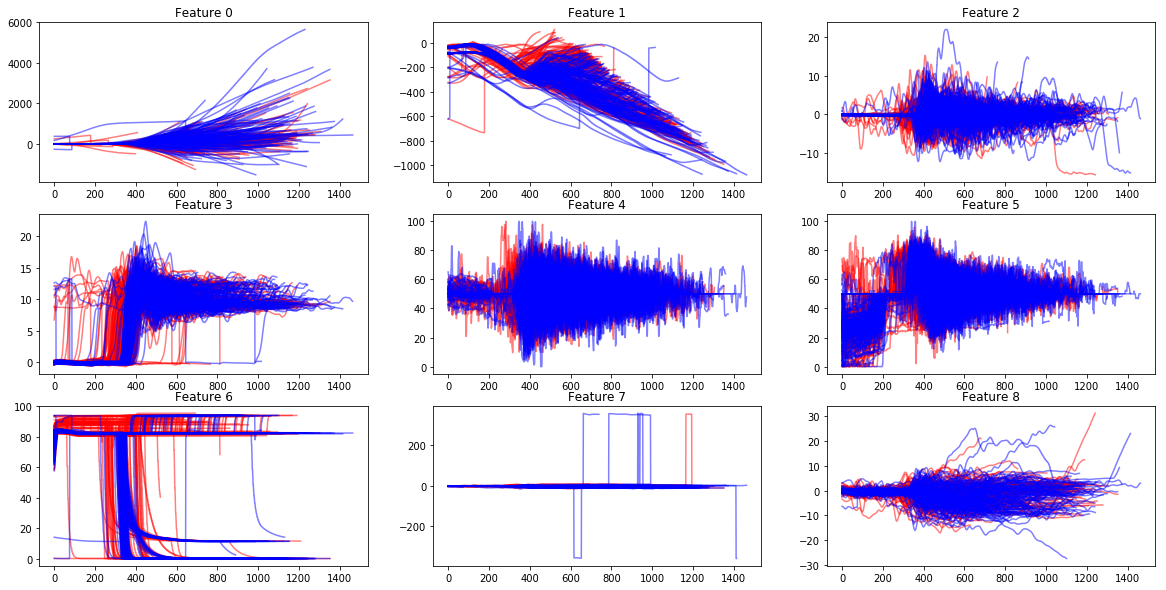

In [0]:
plt.figure(figsize=(20,10))

for feature in range(9):
    plt.subplot(3,3,feature+1)
    for row in idx_to_label.iterrows():
        idx, label = row[1]["Id"], row[1]["label"]
        plt.plot(df.loc[df["Id"]==idx,f"{feature}"].values,color="red" if label==0 else "blue",alpha=0.5)
    plt.title(f"Feature {feature}")

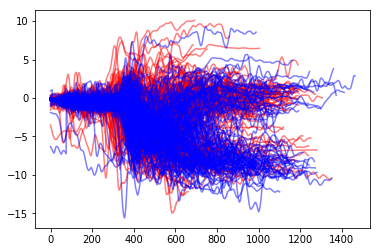

In [0]:
for row in idx_to_label.iterrows():
    idx, label = row[1]["Id"], row[1]["label"]
    data = df.loc[df["Id"]==idx,"7"].values
    data = data[(data<100)&(data>-100)]
    plt.plot(data,color="red" if label==0 else "blue",alpha=0.5)


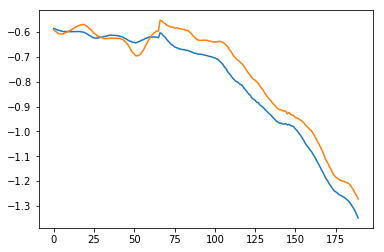

In [0]:
f3 = np.array([k[7][200:390] for k in X_train])
plt.plot(np.mean(f3[mask_zero],axis=0))
plt.plot(np.mean(f3[mask_one],axis=0))

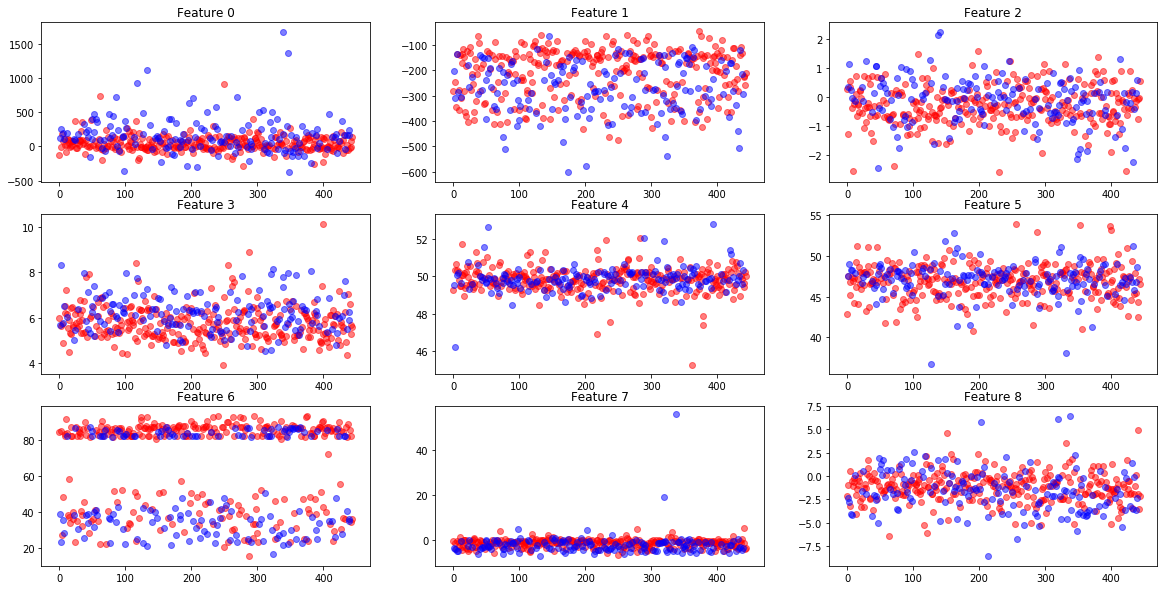

In [0]:
plt.figure(figsize=(20,10))

for feature in range(9):
    plt.subplot(3,3,feature+1)
    for row in idx_to_label.iterrows():
        idx, label = row[1]["Id"], row[1]["label"]
        plt.scatter(idx,df.loc[df["Id"]==idx,f"{feature}"].values.mean(),color="red" if label==0 else "blue",alpha=0.5)
    plt.title(f"Feature {feature}")

In [0]:
from sklearn.metrics import pairwise_distances
import scipy.stats as st

def generate_features(ts, labels=None):
    latent_df = []
    for sample in ts:
        features = {}
        for f in range(10):
            features[f"mean_{f}"] = sample[:,f].mean()
            features[f"median_{f}"] = np.median(sample[:,f])
            features[f"std_{f}"] = np.std(sample[:,f])
            features[f"kurt_{f}"] = st.kurtosis(sample[:,f])
            features[f"skew_{f}"] = st.skew(sample[:,f])
            features[f"min_{f}"] = np.min(sample[:,f])
            features[f"max_{f}"] = np.max(sample[:,f])
            features[f"iqr_{f}"] = st.iqr(sample[:,f])
        #corrs
        corrs = np.corrcoef(sample)
        corrs = corrs[np.triu_indices(corrs.shape[0], k = 1)]
        #cosines
        cosines = pairwise_distances(sample, metric="cosine")
        cosines = cosines[np.triu_indices(cosines.shape[0], k = 1)]
        #minkowski
        minkowski = pairwise_distances(sample, metric="minkowski")
        minkowski = minkowski[np.triu_indices(minkowski.shape[0], k = 1)]
        for i in range(corrs.shape[0]):
            features[f"var_{i}"] = corrs[i]
            features[f"cos_{i}"] = cosines[i]
            features[f"mik_{i}"] = minkowski[i]
        latent_df.append(features)
    latent_df = pd.DataFrame(latent_df)
    if labels is not None:
        latent_df["label"] = labels
    return latent_df
all_data = generate_features(all_ts, idx_to_label["label"].values)
all_data.head()

,cos_0,cos_1,cos_10,cos_11,cos_12,cos_13,cos_14,cos_15,cos_16,cos_17,cos_18,cos_19,cos_2,cos_20,cos_21,cos_22,cos_23,cos_24,cos_25,cos_26,cos_27,cos_28,cos_29,cos_3,cos_30,cos_31,cos_32,cos_33,cos_34,cos_35,cos_36,cos_37,cos_38,cos_39,cos_4,cos_40,cos_41,cos_42,cos_43,cos_44,...,var_14,var_15,var_16,var_17,var_18,var_19,var_2,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_3,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_4,var_40,var_41,var_42,var_43,var_44,var_5,var_6,var_7,var_8,var_9,label
0,1.716726,0.317059,1.910558,1.874670,1.950100,1.461565,0.134072,0.224622,1.885419,0.373050,0.563057,0.617110,0.124092,1.013035,1.686855,1.705938,0.618419,0.250125,0.183012,0.818515,1.965496,1.893260,0.244012,0.329644,0.060008,0.220703,1.786432,1.752106,0.016475,0.352325,1.809250,1.761685,0.045915,1.252429,0.311613,1.258437,0.236411,0.032264,1.782469,1.744685,...,0.609276,0.389925,-0.161751,0.560680,0.613123,0.081373,0.764603,-0.540886,-0.674367,-0.683526,0.056896,0.069287,0.511708,-0.993310,-0.919436,-0.761443,0.152174,0.136456,-0.202973,-0.024354,-0.211810,-0.252418,-0.007455,-0.530722,-0.362666,-0.285831,0.269394,0.917076,0.248770,0.769433,-0.151358,0.928203,-0.154431,-0.147614,-0.779124,-0.924198,-0.965418,0.115319,-0.283525,0
1,1.708981,0.406368,1.916602,1.875216,1.944294,1.463186,0.115679,0.551690,1.892839,0.261194,0.465753,0.485499,0.155197,0.944456,1.804599,1.653465,0.502755,0.256728,0.193362,0.816974,1.942822,1.343373,0.240316,0.357198,0.053253,0.214506,1.799377,1.543175,0.016630,0.327983,1.818224,1.490471,0.034878,1.292624,0.337301,1.442801,0.239497,0.451188,1.797349,1.503893,...,0.643867,-0.007587,-0.165545,0.642004,0.486155,0.169110,0.716580,-0.609102,-0.779835,-0.538247,0.074126,-0.085171,0.459020,-0.990673,-0.862301,0.066875,0.152077,0.058597,-0.397456,0.116395,-0.178754,-0.443297,-0.061275,-0.483969,-0.335709,-0.012433,0.312679,0.860666,0.216914,-0.087055,-0.151290,0.280637,-0.150921,-0.022981,-0.740225,-0.784683,0.119659,0.107837,-0.497989,0
2,1.808870,1.290970,1.932918,1.823341,1.896331,1.150907,0.069137,0.785249,1.847641,1.423485,1.337145,1.458850,0.166823,1.048642,0.515170,0.705300,1.425555,0.273113,0.203143,1.022504,1.917723,1.150969,0.256440,0.411599,0.093221,0.380765,1.756958,1.313283,0.023633,0.572590,1.780336,1.245440,0.059914,1.048650,0.364197,1.111008,0.399934,0.604252,1.766294,1.290489,...,0.828500,-0.058640,-0.145616,-0.181641,0.514363,-0.197045,0.719678,0.300486,0.276745,0.198396,-0.050540,-0.006864,0.445106,-0.907886,-0.812966,0.097829,0.127928,-0.056720,-0.278309,0.063565,-0.055377,-0.169045,-0.050015,-0.560982,-0.292780,0.078593,0.234851,0.833900,0.247533,0.091428,-0.150862,0.282150,-0.126193,-0.024253,-0.591798,-0.659435,0.490108,0.085078,0.391855,0
3,0.711727,0.409213,1.799990,1.816790,1.921613,1.844230,0.407661,0.222570,1.831227,1.740850,1.552959,1.653725,1.718934,1.621589,0.989563,0.659024,1.606689,0.361836,0.291889,0.306268,1.330604,1.689053,0.343414,1.377060,0.050488,0.007320,1.480110,1.644450,0.015419,0.038417,1.505687,1.675780,0.042301,1.483677,1.358389,1.669876,0.011362,0.136718,1.475461,1.650040,...,0.405231,0.571313,-0.136143,-0.575736,0.571407,-0.338748,-0.671997,-0.413390,-0.390623,-0.074666,-0.096179,-0.126248,0.389926,0.913917,-0.033119,-0.465516,0.112182,0.004489,-0.179755,-0.040053,-0.098765,-0.068413,-0.016247,0.226500,-0.205991,-0.274971,0.199343,-0.194697,0.021598,-0.591821,0.088512,0.828176,-0.051992,-0.129698,-0.677465,-0.470564,-0.062680,-0.053618,0.330429,0
4,1.513967,0.806626,1.757829,1.811871,1.922669,1.394795,0.434913,0.827673,1.846940,0.623143,0.691963,0.885759,0.142886,1.043004,1.438919,1.453860,0.815613,0.312059,0.236653,1.009045,1.862348,1.410059,0.290857,0.378027,0.080798,0.318919,1.695868,1.478899,0.032961,0.461298,1.670667,1.323500,0.047547,1.077099,0.335051,1.146676,0.337294,0.194851,1.664904,1.386278,...,0.014614,-0.310801,-0.110285,0.355309,0.640374,-0.203510,0.749317,-0.235392,-0.431052,-0.422758,0.026804,0.004229,0.4

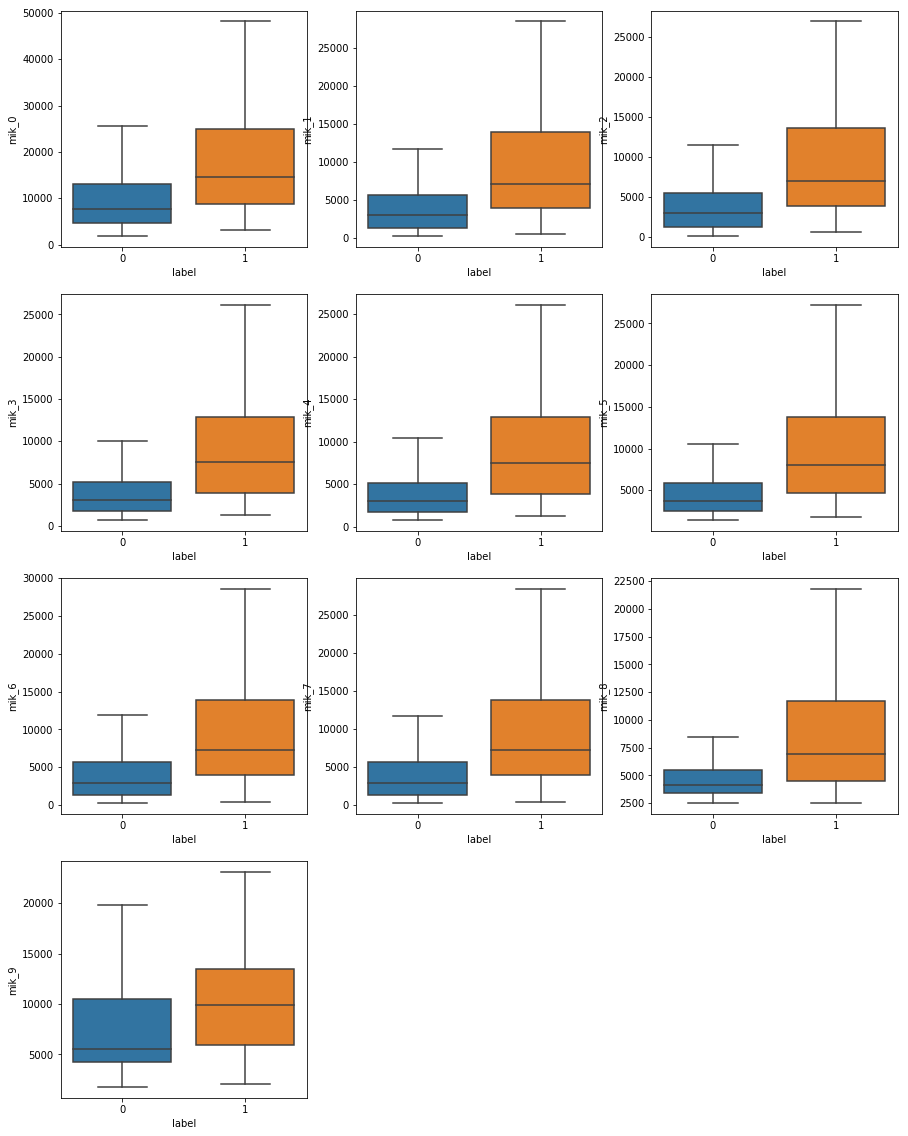

In [0]:
import seaborn as sns
#plotting the mink
plt.figure(figsize=(15,20))
for f in range(10):
    plt.subplot(4,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'mik_{f}',showfliers=False)
    plt.plot()


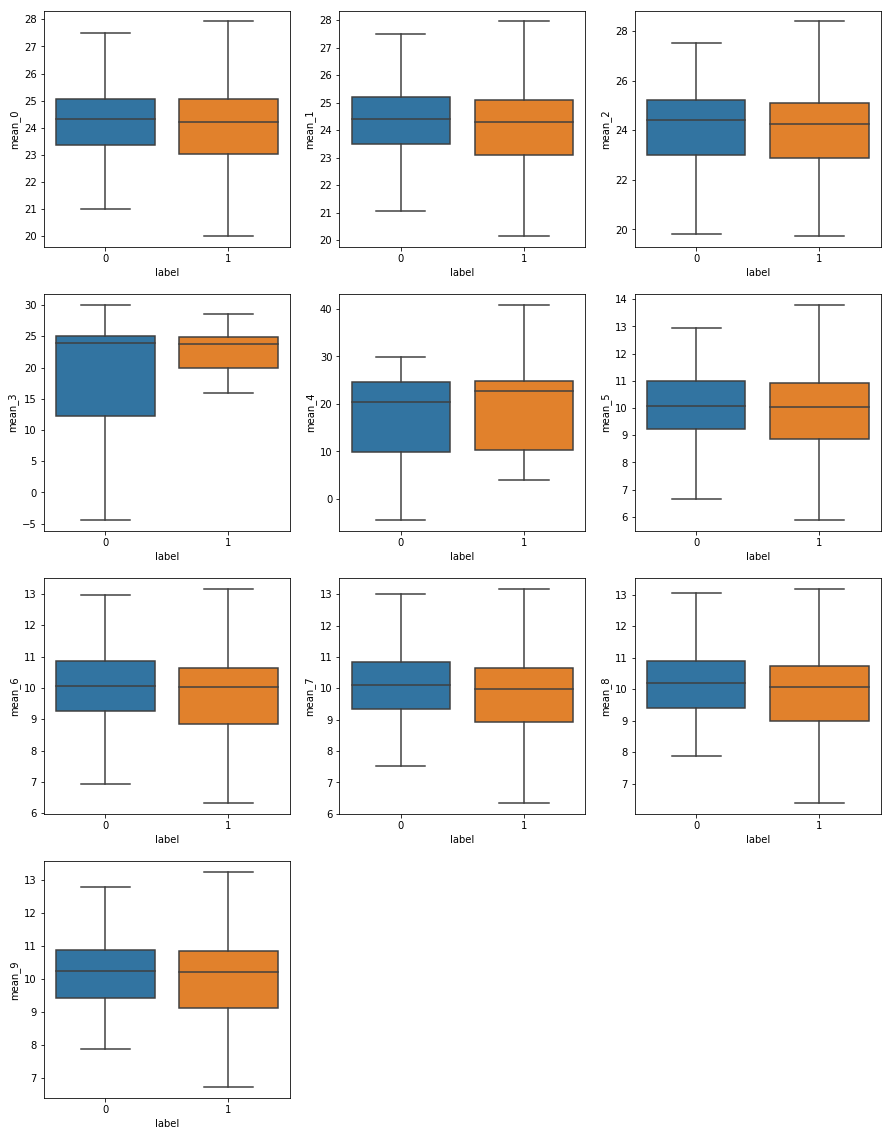

In [0]:
import seaborn as sns
#plotting the means
plt.figure(figsize=(15,20))
for f in range(10):
    plt.subplot(4,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'mean_{f}',showfliers=False)
    plt.plot()


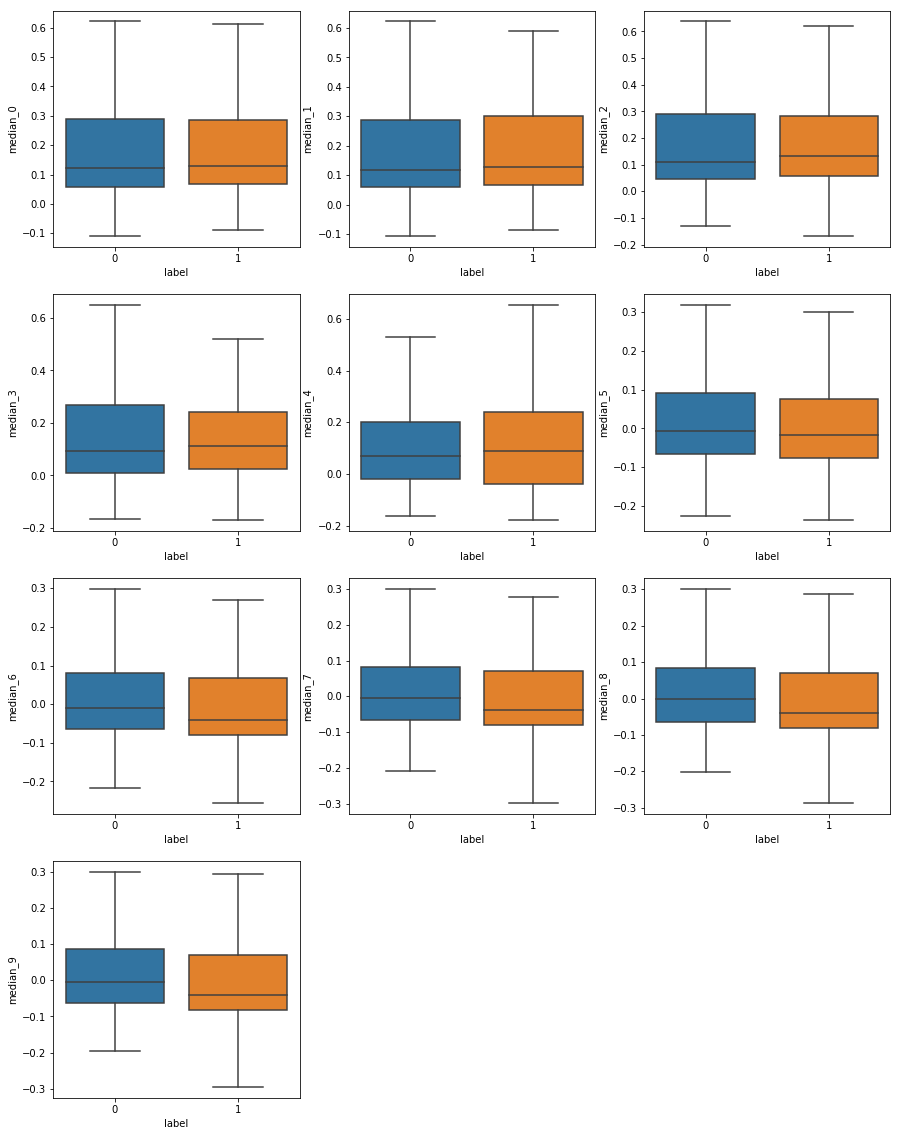

In [0]:
import seaborn as sns
#plotting the medians
plt.figure(figsize=(15,20))
for f in range(10):
    plt.subplot(4,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'median_{f}',showfliers=False)
    plt.plot()


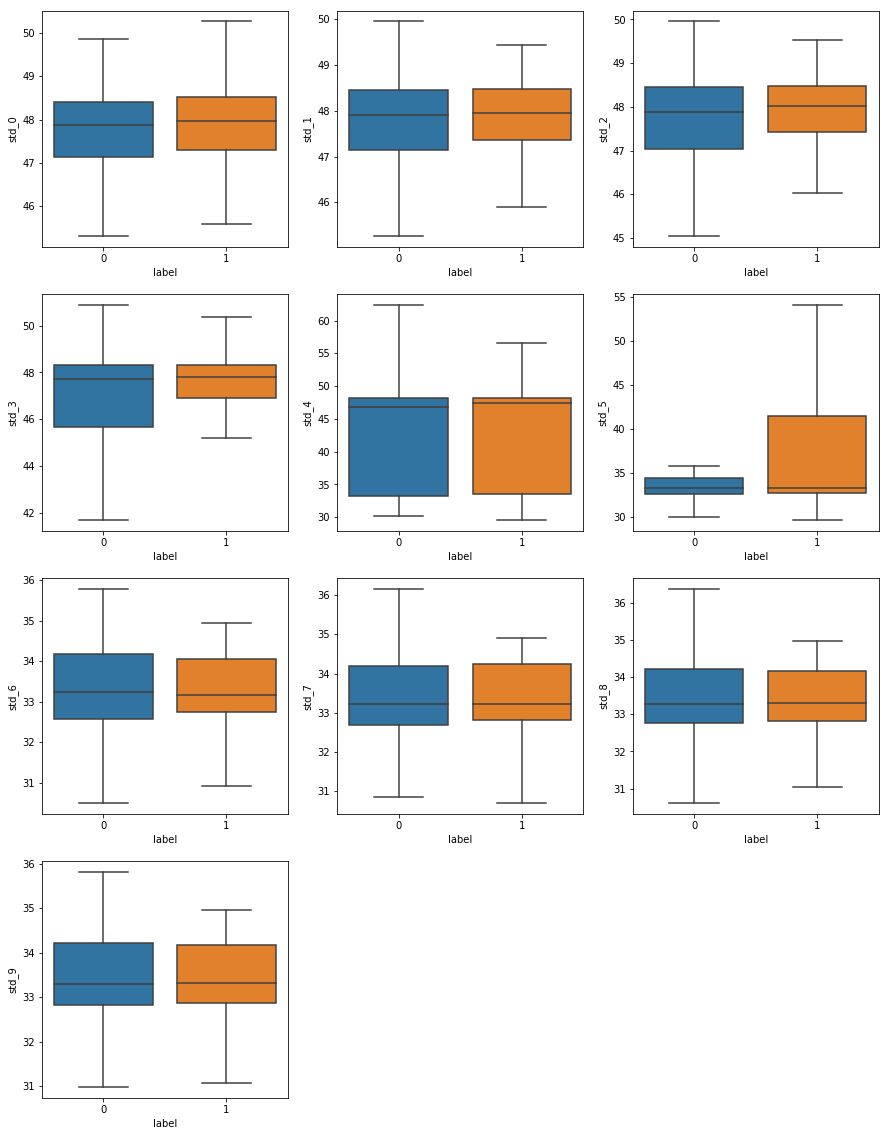

In [0]:
import seaborn as sns
#plotting the std
plt.figure(figsize=(15,20))
for f in range(10):
    plt.subplot(4,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'std_{f}',showfliers=False)
    plt.plot()


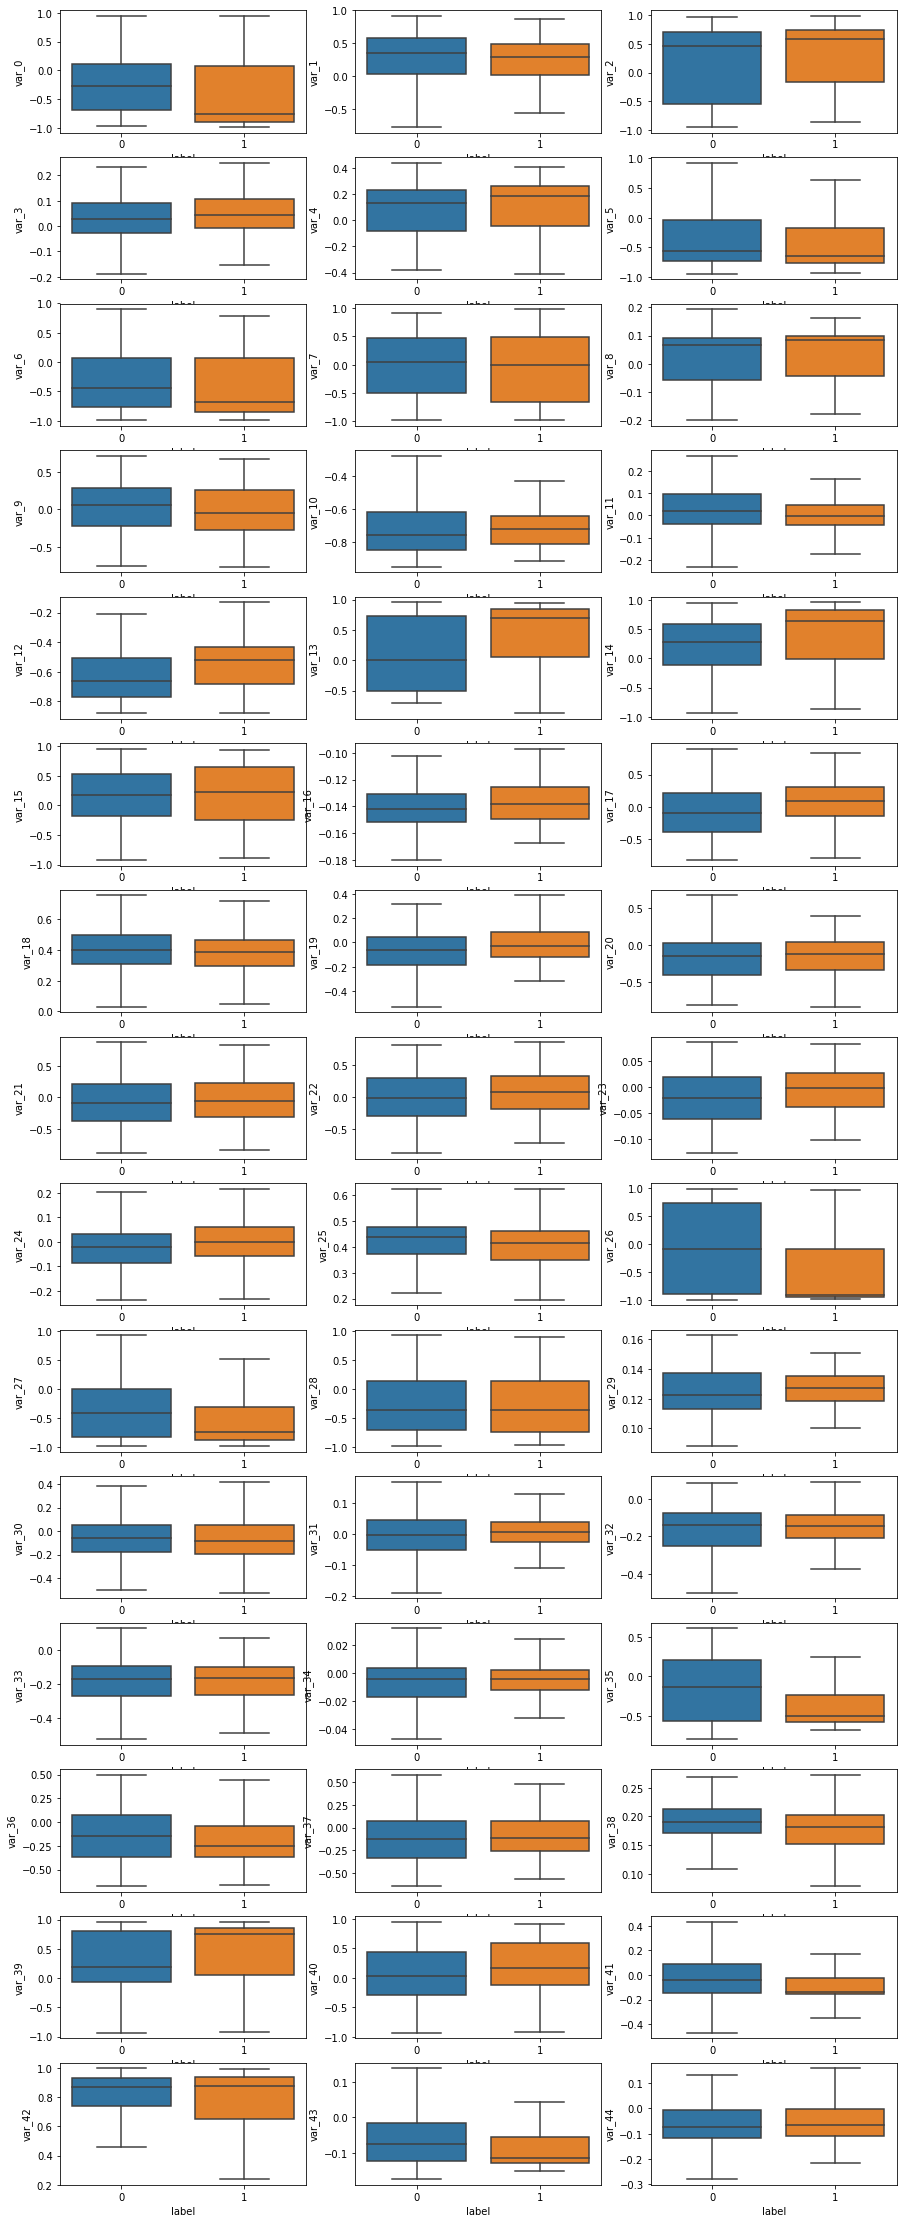

In [0]:
import seaborn as sns
#plotting the correlation coefs
plt.figure(figsize=(15,40))
for f in range(45):
    plt.subplot(15,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'var_{f}',showfliers=False)
    plt.plot()


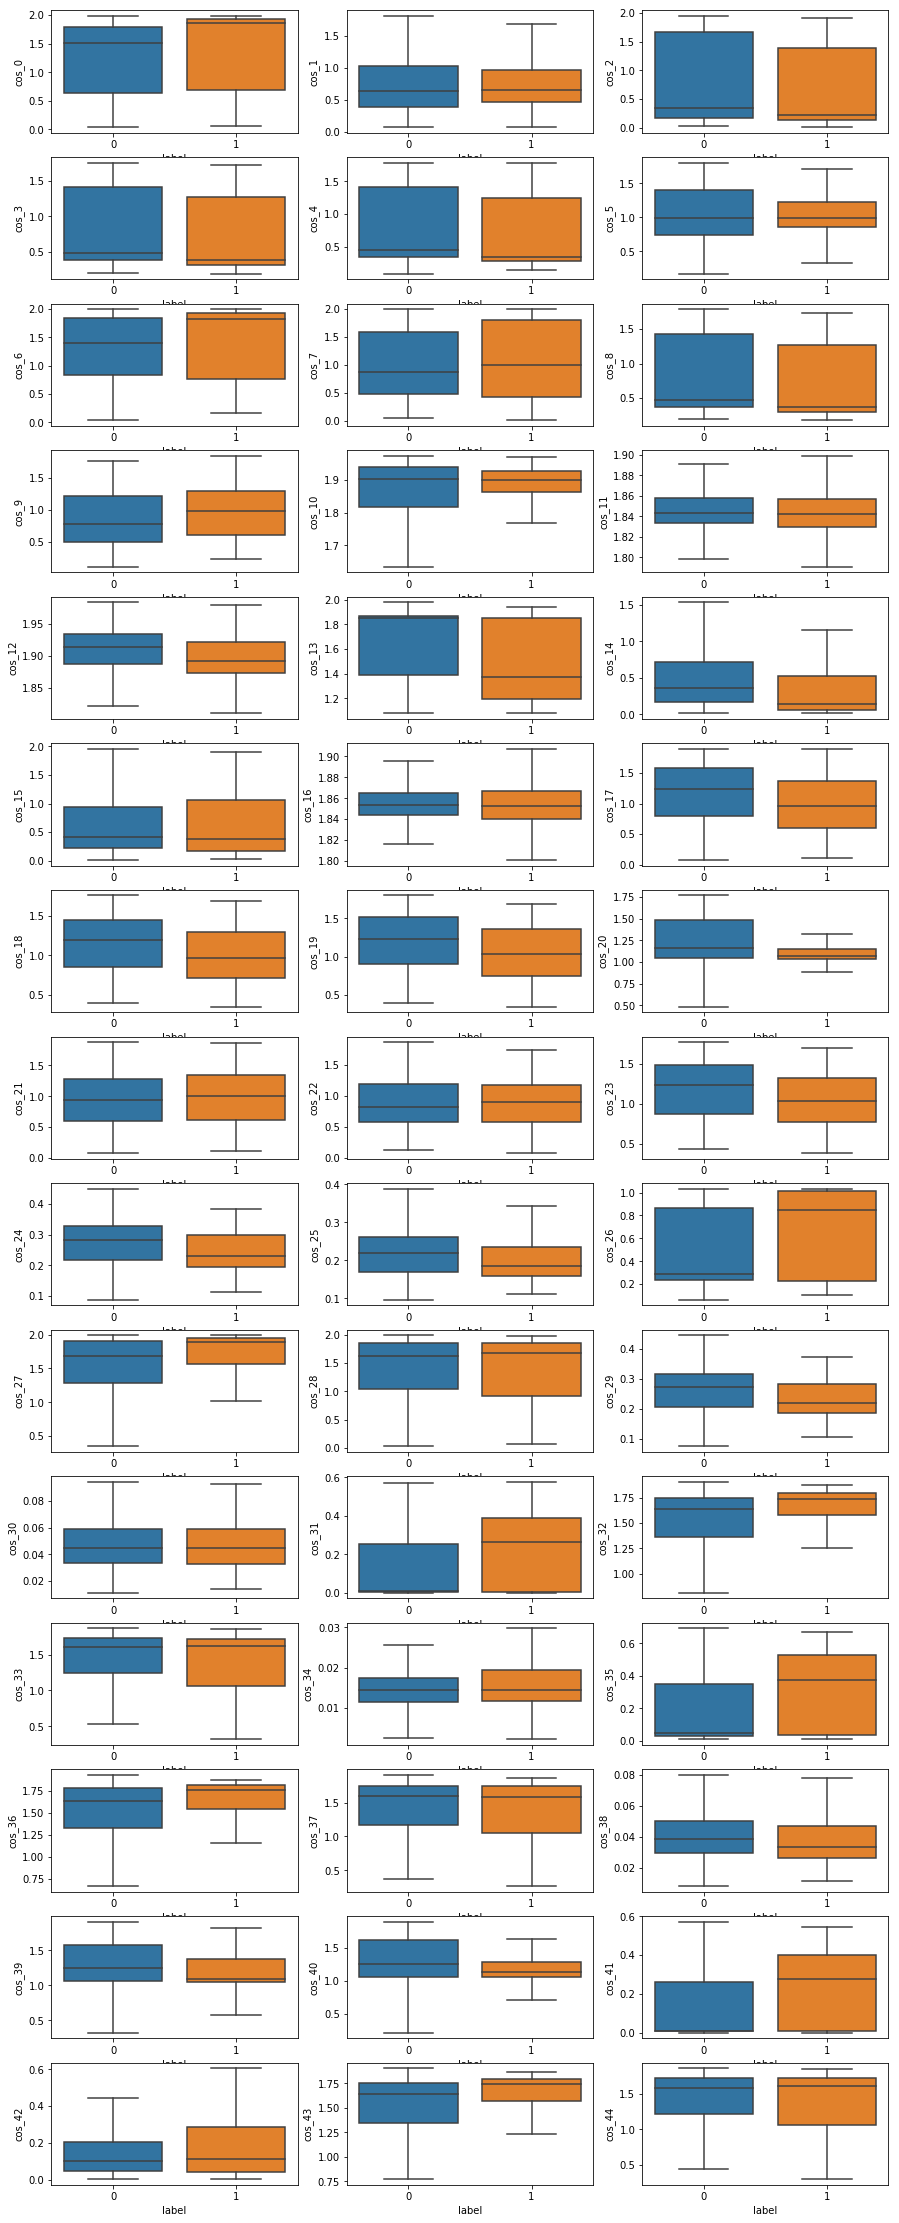

In [0]:
import seaborn as sns
#plotting the correlation coefs
plt.figure(figsize=(15,40))
for f in range(45):
    plt.subplot(15,3,f+1)
    sns.boxplot(data=all_data, x='label', y=f'cos_{f}',showfliers=False)
    plt.plot()


In [0]:
# train_test_split
from sklearn.model_selection import train_test_split

Xtr, Xts, Ytr, Yts = train_test_split(all_data, all_data["label"].values,test_size=0.1, random_state=1, 
                                      shuffle=True, stratify=all_data["label"].values)
print(Xtr.shape)
print(Xts.shape)

(399, 216)
(45, 216)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(learning_rate=0.8,n_estimators=50,random_state=42) #90 all
ada_msk = Xtr.columns.str.startswith("cos") #| latent_dataframe.columns.str.startswith("var")
Xada = Xtr[Xtr.columns[ada_msk]]

cv = cross_validate(ada_clf, Xada, Xtr["label"], cv=5,scoring=["accuracy","precision","recall","f1"])

ada_predict = cross_val_predict(ada_clf, Xada, Xtr["label"], cv=5)
print("F1",cv["test_f1"].mean())
print("Precision",cv["test_precision"].mean())
print("Recall",cv["test_recall"].mean())
print("Acc",cv["test_accuracy"].mean())
#F1 0.592106782106782
#Precision 0.6558644338118021
#Recall 0.5498924731182795
#Acc 0.738698785608898

F1 0.5416019927784633
Precision 0.6393874643874644
Recall 0.4814814814814815
Acc 0.7221753398968588


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


log_clf = LogisticRegression(C=100, solver="liblinear", class_weight={0:10,1:60})
log_msk = Xtr.columns.str.startswith("var")
Xlog = Xtr[Xtr.columns[log_msk]]

cv = cross_validate(log_clf, Xlog, Xtr["label"], cv=5,scoring=["accuracy","precision","recall","f1"])
log_predict = cross_val_predict(log_clf, Xlog, Xtr["label"], cv=5)

print("F1",cv["test_f1"].mean())
print("Precision",cv["test_precision"].mean())
print("Recall",cv["test_recall"].mean())
print("Acc",cv["test_accuracy"].mean())
#F1 0.5944824134456954
#Precision 0.5337264761341369
#Recall 0.6741935483870968
#Acc 0.6848655090228124

F1 0.6015939448317863
Precision 0.4603174603174603
Recall 0.875925925925926
Acc 0.6015314892952024


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


svm_clf = SVC(C=80,gamma="auto")
svm_msk = Xtr.columns.str.startswith("cos") | Xtr.columns.str.startswith("var")
Xsvm = Xtr[Xtr.columns[svm_msk]]

cv = cross_validate(svm_clf, Xsvm, Xtr["label"], cv=5,scoring=["accuracy","precision","recall","f1"])
svc_predict = cross_val_predict(svm_clf, Xsvm, Xtr["label"], cv=5)

print("F1",cv["test_f1"].mean())
print("Precision",cv["test_precision"].mean())
print("Recall",cv["test_recall"].mean())
print("Acc",cv["test_accuracy"].mean())

F1 0.593325247079964
Precision 0.6697840022296544
Recall 0.5476190476190476
Acc 0.7422409751523675


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


log_clf2 = LogisticRegression(C=140,solver="liblinear", class_weight={0:10,1:30}, max_iter=300)#SVC(C=90,gamma="auto")
log_msk2 = Xtr.columns.str.startswith("mik") | Xtr.columns.str.startswith("var")
Xlog2 = Xtr[Xtr.columns[log_msk2]]

cv = cross_validate(log_clf2, Xlog2, Xtr["label"], cv=5,scoring=["accuracy","precision","recall","f1"])
log_predict2 = cross_val_predict(log_clf2, Xlog2, Xtr["label"], cv=5)

print("F1",cv["test_f1"].mean())
print("Precision",cv["test_precision"].mean())
print("Recall",cv["test_recall"].mean())
print("Acc",cv["test_accuracy"].mean())

F1 0.6840409606465536
Precision 0.5935635717701715
Recall 0.8103174603174603
Acc 0.7419284263166119


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


rf_clf = RandomForestClassifier(n_estimators=80,max_depth=15,random_state=42)
rf_msk = Xtr.columns.str.startswith("mik") | Xtr.columns.str.startswith("cos")
Xrf = Xtr[Xtr.columns[rf_msk]]

cv = cross_validate(rf_clf, Xrf, Xtr["label"], cv=5,scoring=["accuracy","precision","recall","f1"])
rf_predict = cross_val_predict(rf_clf, Xrf, Xtr["label"], cv=5)

print("F1",cv["test_f1"].mean())
print("Precision",cv["test_precision"].mean())
print("Recall",cv["test_recall"].mean())
print("Acc",cv["test_accuracy"].mean())

F1 0.5596953357201804
Precision 0.6447138047138047
Recall 0.5034391534391534
Acc 0.7343334896077512


In [0]:
np.corrcoef([log_predict,svc_predict, ada_predict, log_predict2, rf_predict])

array([[1.        , 0.40484419, 0.29153699, 0.40764463, 0.35433178],
       [0.40484419, 1.        , 0.41464748, 0.4239559 , 0.4969992 ],
       [0.29153699, 0.41464748, 1.        , 0.3871227 , 0.4428449 ],
       [0.40764463, 0.4239559 , 0.3871227 , 1.        , 0.48263129],
       [0.35433178, 0.4969992 , 0.4428449 , 0.48263129, 1.        ]])

In [0]:
new_df_two_steps = np.array([log_predict,svc_predict, ada_predict, log_predict2, rf_predict]).T
new_df_two_steps.shape


(399, 5)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Xtr["label"],np.median(new_df_two_steps,1)>0.5))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       262
           1       0.66      0.70      0.68       137

    accuracy                           0.77       399
   macro avg       0.75      0.76      0.75       399
weighted avg       0.78      0.77      0.78       399



In [0]:
# Evaluation

#models
models = [
    (log_clf, Xlog, log_msk),
    (log_clf2, Xlog2, log_msk2),
    (rf_clf, Xrf, rf_msk),
    (svm_clf, Xsvm, svm_msk),
    (ada_clf, Xada, ada_msk)
]

latent_valid = []
for model, model_data, model_msk in models:
    model.fit(model_data,Xtr["label"])
    latent_valid.append(model.predict(Xts[Xts.columns[model_msk]]))
latent_valid = np.array(latent_valid).T
latent_valid.shape

(45, 5)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Xts["label"],np.median(latent_valid,1)>0.5))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.73      0.69      0.71        16

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.78        45
weighted avg       0.80      0.80      0.80        45



In [0]:
# testing

#load data
test_df = pd.read_csv("CAE_test_dataset.csv")
test_df = test_df.interpolate()
all_ts_test = seperate_ts(test_df, test_df["Id"].unique())
all_data_test = generate_features(all_ts_test)
all_data_test["label"]=0

In [0]:
#predict
models = [
    (log_clf, Xlog, log_msk),
    (log_clf2, Xlog2, log_msk2),
    (rf_clf, Xrf, rf_msk),
    (svm_clf, Xsvm, svm_msk),
    (ada_clf, Xada, ada_msk)
]

latent_test = []
for model, model_data, model_msk in models:
    model.fit(model_data,Xtr["label"])
    latent_test.append(model.predict(all_data_test[all_data_test.columns[model_msk]]))
latent_test = np.array(latent_test).T
latent_test.shape

(214, 5)

In [0]:
#predict
all_data_test["Id"] = test_df["Id"].unique()
all_data_test["label"] = (np.median(latent_test,1)>0.5)*1

In [0]:
#save_to_file
all_data_test[["Id","label"]].to_csv("data_pirates.csv")

In [0]:
Counter(all_data_test["label"])

Counter({0: 141, 1: 73})